In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

fichiers = {
    "C:/Users/USER/Documents/projet&code/datasets/football/ligue1/season-2122.csv": "2021/2022",
    "C:/Users/USER/Documents/projet&code/datasets/football/ligue1/season-2223.csv": "2022/2023",
    "C:/Users/USER/Documents/projet&code/datasets/football/ligue1/season-2324.csv": "2023/2024",
    "C:/Users/USER/Documents/projet&code/datasets/football/ligue1/season-2425.csv": "2024/2025",

}

# Liste pour stocker les DataFrames
dfs = []

# Charger les fichiers un par un
for fichier, saison in fichiers.items():
    df = pd.read_csv(fichier)
    df["Saison"] = saison  # Ajouter la saison dans une nouvelle colonne
    dfs.append(df)

# Fusionner tous les DataFrames en un seul
ligue1_all = pd.concat(dfs, ignore_index=True)
print(ligue1_all.shape)








(1372, 23)


In [3]:
# netoyage des donnes
ligue1_all["HST"] = ligue1_all["HST"].fillna(0)
ligue1_all["AST"] = ligue1_all["AST"].fillna(0)
ligue1_all["HF"] = ligue1_all["HF"].fillna(0)
ligue1_all["AF"] = ligue1_all["AF"].fillna(0)

# Supprimer les lignes sans issue de match (FTR)
ligue1_all = ligue1_all.dropna(subset=["FTR"])
print(ligue1_all.head(3))
print(ligue1_all.shape)
print(ligue1_all.columns)

##
ligue1_all['Date'] = pd.to_datetime(ligue1_all['Date'])
ligue1_all['Month'] = ligue1_all['Date'].dt.month
ligue1_all['Day'] = ligue1_all['Date'].dt.day
# Drop the original date column if not needed
ligue1_all.drop('Referee', axis=1, inplace=True)
ligue1_all.drop('Date', axis=1, inplace=True)
print(ligue1_all.head(3))
print(ligue1_all.shape)
print(ligue1_all.columns)

       Date HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  Referee  ...  \
0  06/08/21   Monaco    Nantes     1     1   D     1     1   D      NaN  ...   
1  07/08/21     Lyon     Brest     1     1   D     0     1   A      NaN  ...   
2  07/08/21   Troyes  Paris SG     1     2   A     1     2   A      NaN  ...   

   AST  HF  AF  HC  AC  HY  AY  HR  AR     Saison  
0    1   6  14   5   2   0   0   0   0  2021/2022  
1    8  10  12   9   4   1   1   0   0  2021/2022  
2    3   3  15   9   1   1   4   0   0  2021/2022  

[3 rows x 23 columns]
(1372, 23)
Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'Saison'],
      dtype='object')
  HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  ...  AF  HC  AC  \
0   Monaco    Nantes     1     1   D     1     1   D  15   5  ...  14   5   2   
1     Lyon     Brest     1     1   D     0     1   A  17  

C:\Users\USER\AppData\Local\Temp\ipykernel_10852\1263174080.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ligue1_all['Date'] = pd.to_datetime(ligue1_all['Date'])


encodage 

In [4]:
ligue1_all = pd.get_dummies(ligue1_all, columns=["HomeTeam", "AwayTeam"], drop_first=True)

# Définir X et y
y = ligue1_all["FTR"].map({"H": 0, "D": 1, "A": 2})  # cible
X = ligue1_all.drop(columns=["FTR", "HTR", "Saison"], errors="ignore")  # variables d'entrée

pca


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_components = 30
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train)


apprentisage

In [8]:


model_pca = RandomForestClassifier(n_estimators=100, random_state=48)

   # Fit the model on the reduced training data
model_pca.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=48)

In [9]:
# #evaluer le modele
X_test_reduced = pca.transform(X_test)
y_pred_pca = model_pca.predict(X_test_reduced)

print("Accuracywith pca :", accuracy_score(y_test, y_pred_pca))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_pca))
print("Rapport de classification :")
print(classification_report(y_test, y_pred_pca))


Accuracywith pca : 0.7709090909090909
Matrice de confusion :
[[109   2   2]
 [ 26  21  16]
 [  8   9  82]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       113
           1       0.66      0.33      0.44        63
           2       0.82      0.83      0.82        99

    accuracy                           0.77       275
   macro avg       0.75      0.71      0.71       275
weighted avg       0.76      0.77      0.75       275



In [10]:
importances = model_pca.feature_importances_
feature_names = ['PC' + str(i+1) for i in range(n_components)]
sorted_indices = importances.argsort()
sorted_feature_importance = [(feature_names[i], importances[i]) for i in range(len(feature_names))]
sorted_feature_importance.sort(key=lambda x: x[1], reverse=True)
for feature, score in sorted_feature_importance:
       print(f"{feature}: {score}")


PC7: 0.12461770356421618
PC14: 0.0835063926796237
PC10: 0.07159143198381969
PC15: 0.05895531553646495
PC16: 0.053448339721717565
PC13: 0.047256390642032395
PC9: 0.04416802220982643
PC2: 0.03954237785551009
PC12: 0.03681560042451713
PC8: 0.0318854917975336
PC18: 0.02848326191286695
PC3: 0.024221177054216038
PC17: 0.022645951249581867
PC5: 0.022293946499622214
PC4: 0.021782494455216416
PC6: 0.021187328644608757
PC21: 0.020634854820825378
PC29: 0.020475350422091986
PC24: 0.020362993322908442
PC22: 0.02027288625825477
PC30: 0.01961191981562201
PC11: 0.01940604347324527
PC20: 0.01904954691634004
PC26: 0.019011655123929095
PC19: 0.018719639984010973
PC27: 0.018699385509689838
PC25: 0.018579795625534013
PC28: 0.018298210723677905
PC1: 0.017355185397177994
PC23: 0.017121306375318245


plot importance

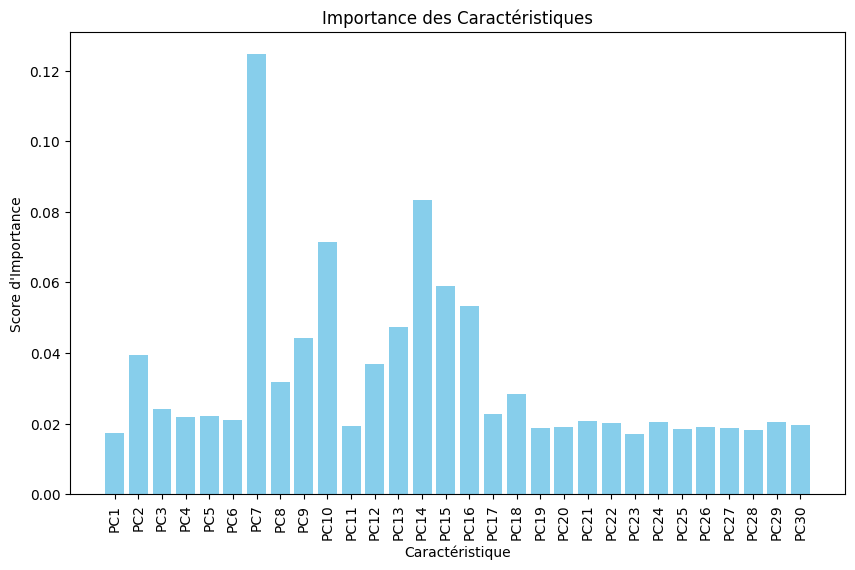

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Importance des Caractéristiques")
plt.bar(range(len(feature_names)), importances, align="center", color="#87CEEB", label="Importance")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel("Caractéristique")
plt.ylabel("Score d'Importance")
plt.show()

In [13]:
loadings = pca.components_.shape
# Obtenir les noms d'origine des colonnes
original_features = X.columns

# Créer un DataFrame pour visualiser les poids de chaque feature sur chaque composante
pca_df = pd.DataFrame(pca.components_, columns=original_features, index=feature_names)
print("Top features dans la composante PC7 :")
print(pca_df.loc["PC7"].sort_values(key=abs, ascending=False).head(5))
print("Top features dans la composante PC14 :")
print(pca_df.loc["PC14"].sort_values(key=abs, ascending=False).head(5))
print("Top features dans la composante PC10 :")
print(pca_df.loc["PC10"].sort_values(key=abs, ascending=False).head(5))
print("Top features dans la composante PC1(la plus basse) :")
print(pca_df.loc["PC1"].sort_values(key=abs, ascending=False).head(5))

Top features dans la composante PC7 :
HC      0.776584
HST    -0.421469
FTHG   -0.264319
AC     -0.246105
AST     0.176359
Name: PC7, dtype: float64
Top features dans la composante PC14 :
FTAG    0.686755
HTAG    0.476363
AST    -0.445530
HY     -0.282823
AS      0.092210
Name: PC14, dtype: float64
Top features dans la composante PC10 :
AST     0.708461
AS     -0.445457
FTAG    0.355624
AC      0.284059
HTAG    0.190607
Name: PC10, dtype: float64
Top features dans la composante PC11 :
AY      0.862467
HY      0.453416
AF     -0.118730
FTAG    0.105341
HTAG    0.066953
Name: PC11, dtype: float64
